In [2]:
import json

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# run the benchmark

# from tests.benchmark_generation import run_benchmark, BENCHMARK_CONFIGS_BASE

# df: pd.DataFrame = run_benchmark(
# 	save_path = "tests/_temp/benchmark_generation.jsonl",
# 	base_configs = None, # this defaults to BENCHMARK_CONFIGS_BASE
#     grid_n_vals = [2, 4, 8, 16],
#     n_mazes_vals = [1, 10, 100],
#     trials = 10,
# )

In [3]:
# or just load the results
df: pd.DataFrame = pd.read_json("../tests/_temp/benchmark_small.jsonl", orient="records", lines=True)

In [4]:
# Convert the `maze_ctor_kwargs` column to string type for easier grouping
df['maze_ctor_kwargs_json'] = df['maze_ctor_kwargs'].apply(lambda x: json.dumps(x, sort_keys=True))

# Group the data by the maze generation method (`maze_ctor`) and `maze_ctor_kwargs`, and calculate the average time to generate a *single* maze in milliseconds (ms)
grouped_df = df.groupby(['maze_ctor', 'maze_ctor_kwargs_json']).apply(lambda x: (x['time'].sum() / x['n_mazes'].sum()) * 1000).reset_index()
grouped_df.columns = ['Maze Generation Method', 'Maze Constructor Arguments', 'Average Time (ms)']

# Apply the formatting function to the 'maze_ctor_kwargs' column
grouped_df['Maze Constructor Arguments'] = grouped_df['Maze Constructor Arguments'].apply(lambda x: ','.join(f"{k}={v}" for k,v in json.loads(x).items()))

# Generate the LaTeX table
print(grouped_df)
latex_table = grouped_df.to_latex(index=False, float_format="%.3f")

print(latex_table)

  Maze Generation Method Maze Constructor Arguments  Average Time (ms)
0                gen_dfs             do_forks=False           1.350634
1                gen_dfs          max_tree_depth=10           1.045183
2                gen_dfs           max_tree_depth=5           0.632920
3                gen_dfs                                      5.109831
4    gen_dfs_percolation                      p=0.0           9.016751
5    gen_dfs_percolation                      p=0.1           8.837150
6    gen_dfs_percolation                      p=0.5           9.926380
7        gen_percolation                      p=0.0           0.177946
8        gen_percolation                      p=0.1           0.223135
9        gen_percolation                      p=0.5           2.215357
\begin{tabular}{llr}
\toprule
Maze Generation Method & Maze Constructor Arguments &  Average Time (ms) \\
\midrule
               gen\_dfs &             do\_forks=False &              1.351 \\
               gen\_dfs & 

C:\Users\mivan\AppData\Local\Temp\ipykernel_17844\831155250.py:13: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex_table = grouped_df.to_latex(index=False, float_format="%.3f")


C:\Users\mivan\AppData\Local\Temp\ipykernel_17844\4090433634.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='grid_n', y='time_ms', hue='maze_ctor', marker='o', ci=None)


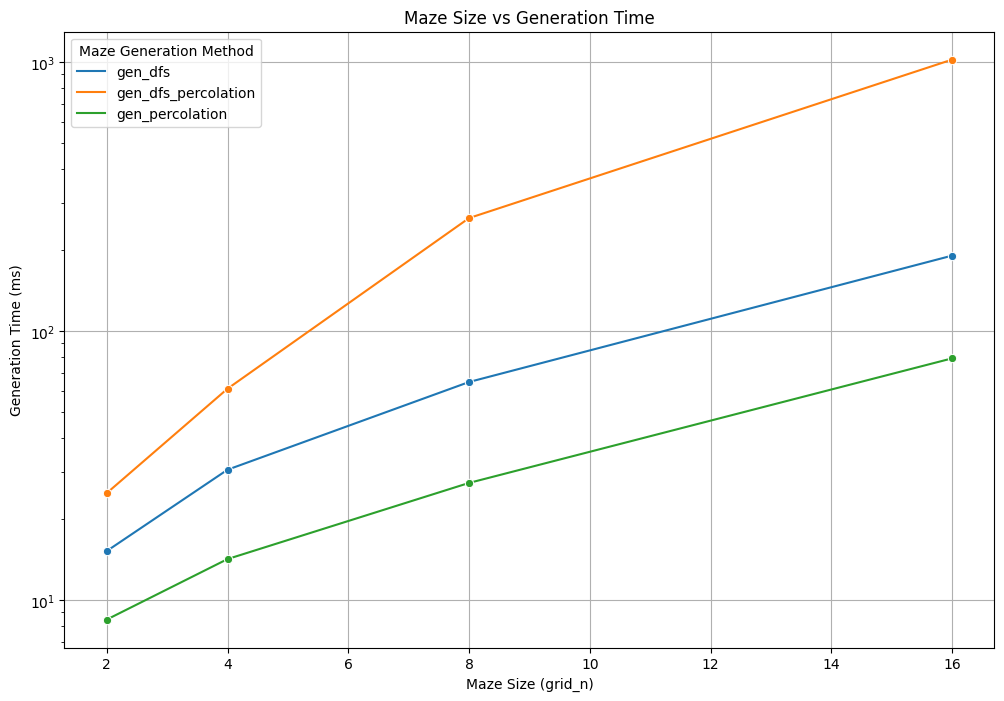

In [7]:
# Convert the 'time' to milliseconds for easier interpretation in the plot
df['time_ms'] = df['time'] * 1000

# Plot maze size vs generation time for each method
plt.figure(figsize=(12, 8))
sns.lineplot(data=df, x='grid_n', y='time_ms', hue='maze_ctor', marker='o', ci=None)
plt.title('Maze Size vs Generation Time')
plt.xlabel('Maze Size (grid_n)')
plt.ylabel('Generation Time (ms)')
plt.yscale('log')
plt.legend(title='Maze Generation Method')
plt.grid(True)
plt.show()

C:\Users\mivan\AppData\Local\Temp\ipykernel_17844\1588234762.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='n_mazes', y='time_ms', hue='maze_ctor', style='grid_n', marker='o', ci=None)


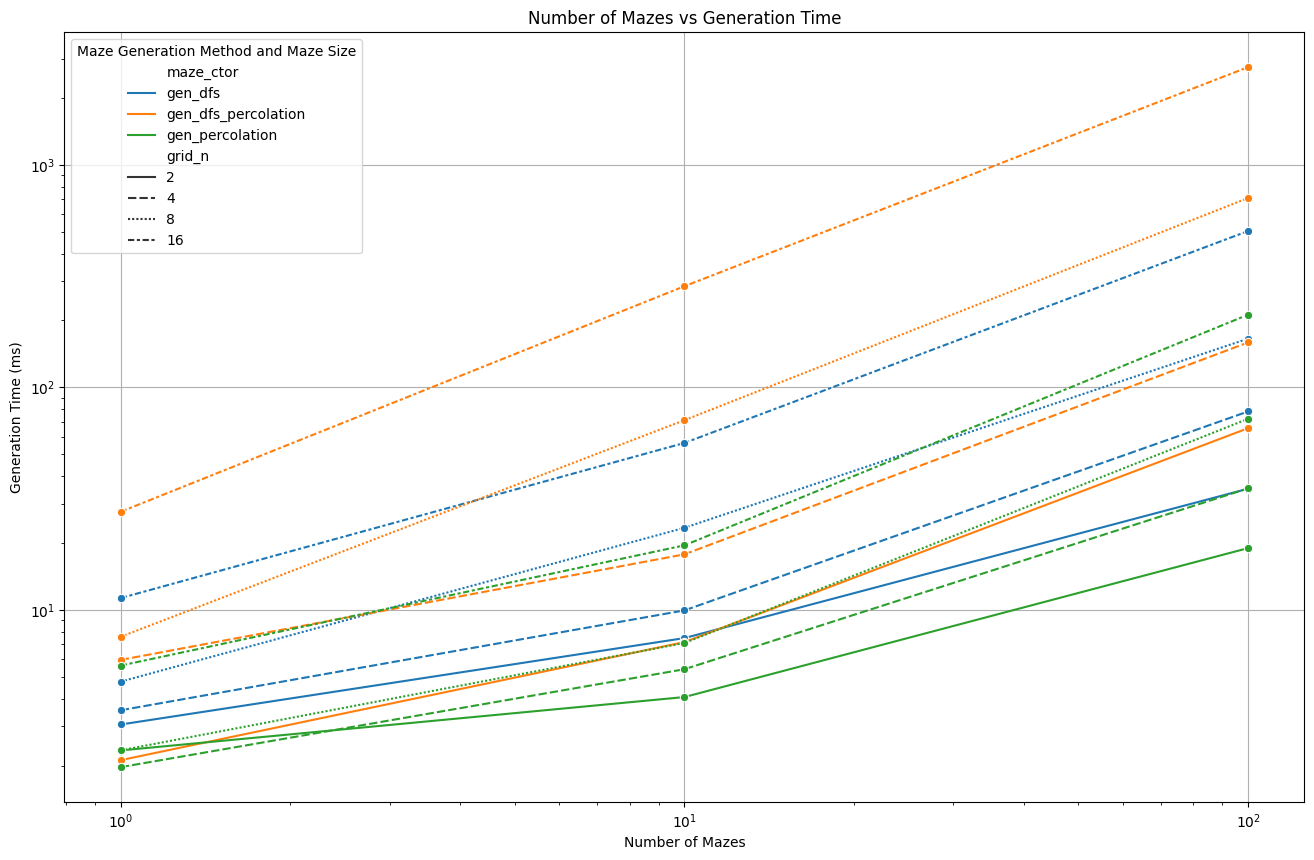

In [9]:
# Plot number of mazes vs generation time for each method and maze size
plt.figure(figsize=(16, 10))
sns.lineplot(data=df, x='n_mazes', y='time_ms', hue='maze_ctor', style='grid_n', marker='o', ci=None)
plt.title('Number of Mazes vs Generation Time')
plt.xlabel('Number of Mazes')
plt.ylabel('Generation Time (ms)')
plt.xscale('log')
plt.yscale('log')
plt.legend(title='Maze Generation Method and Maze Size', loc='upper left')
plt.grid(True)
plt.show()

In [ ]:
# plot the results
df.plot(
	x = "n_mazes",
	y = "time",
	kind = "scatter",
	# logx = True,
	# logy = True,
	title = "Benchmark",
	xlabel = "Number of mazes",
	ylabel = "Time (s)",
)